In [1]:
import sys
sys.path.insert(0, "..")

from sf_runoff import daily_climatology, spatial_avg_daily_input, spatial_stats_daily_input, compute_anomalies, create_it_matrix
from nested_CV import SVR_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction, plot_anomalies
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict
from classic_CV_predict import classic_CV_PCA_SVR_predict, classic_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
nb_name

'ADO_DSC_AT12_0280.ipynb'

In [4]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
daily_input = pd.read_csv(path+nb_name[:-6]+'.csv', index_col=0, parse_dates=True)

In [5]:
t_unit=10

#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-1.2, -0.7, 5)
epsilon_range=np.logspace(-4, -3, 4)
#n_range = [17, 50, 200]
components_range = [5*4*36]
#do not enlarge t_range for now
t_range=[36]
t_length=t_range[0]
n_splits=4
test_size=730

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits

C=0.11220184543019636
eps=0.0001


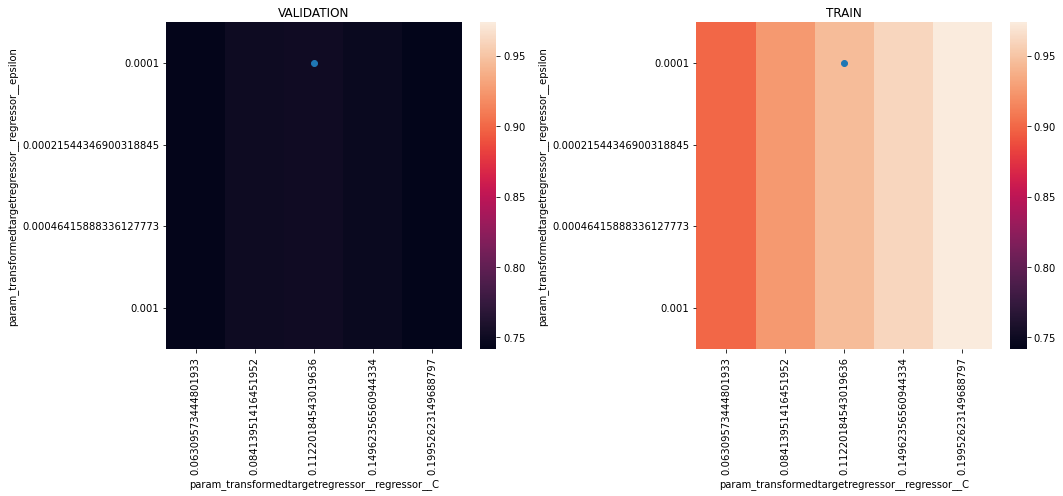

In [9]:
C, eps = SVR_nested_CV_gridsearch(daily_input, C_range,epsilon_range, t_range,t_unit,n_splits,test_size)
print(f'C={C}')
print(f'eps={eps}')

In [6]:
C=0.11220184543019636
eps=0.0001

In [14]:
radius_for_ensemble = 1
predictions = nested_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

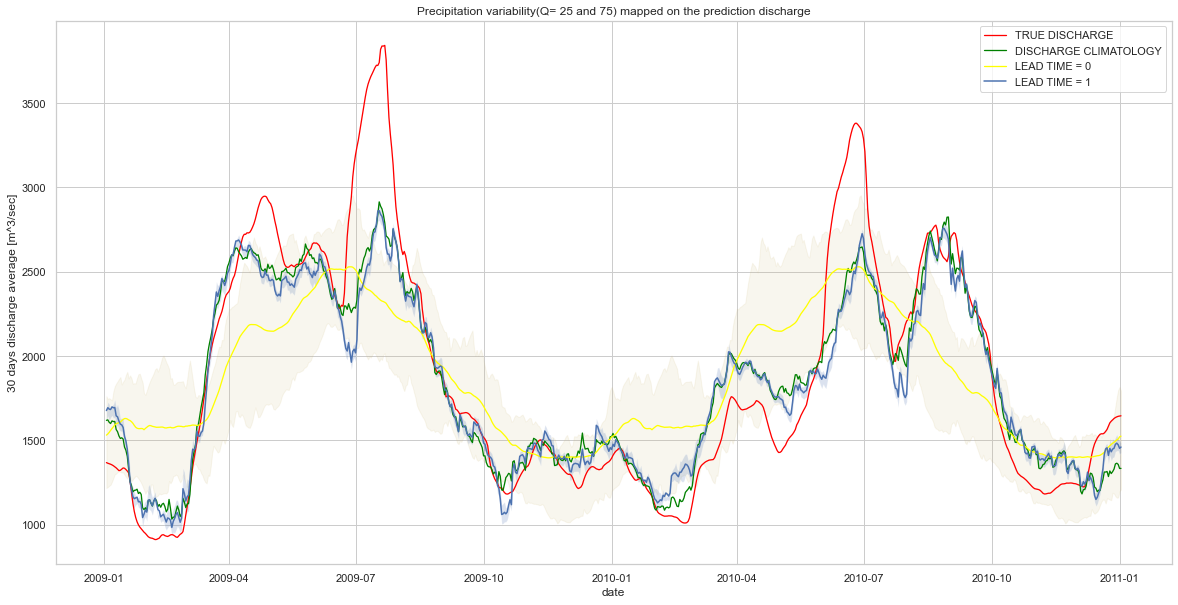

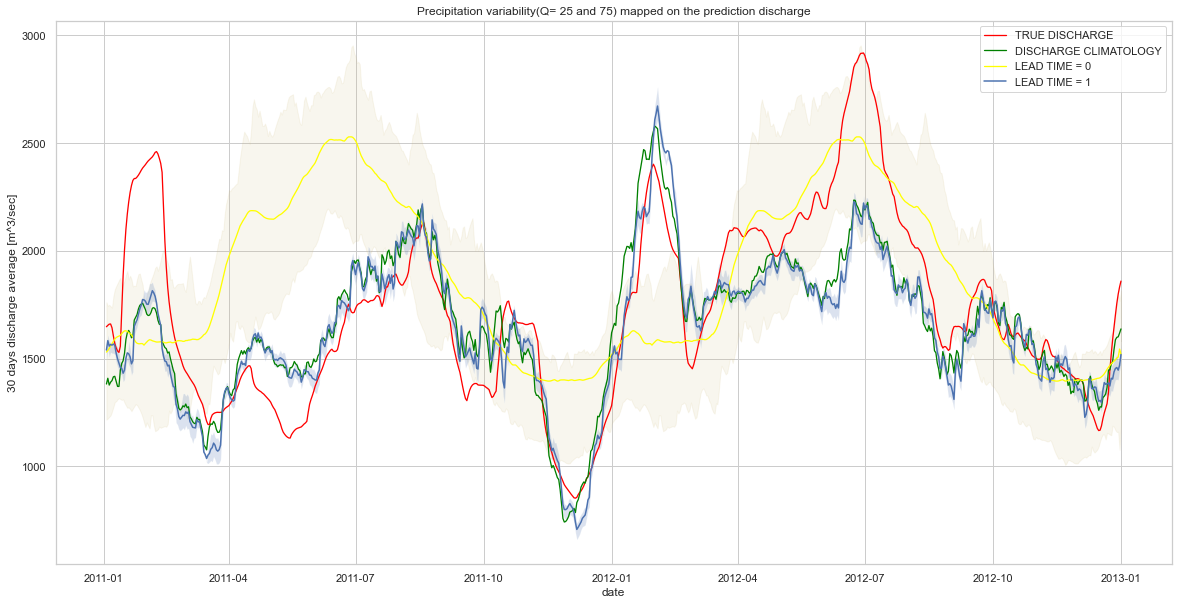

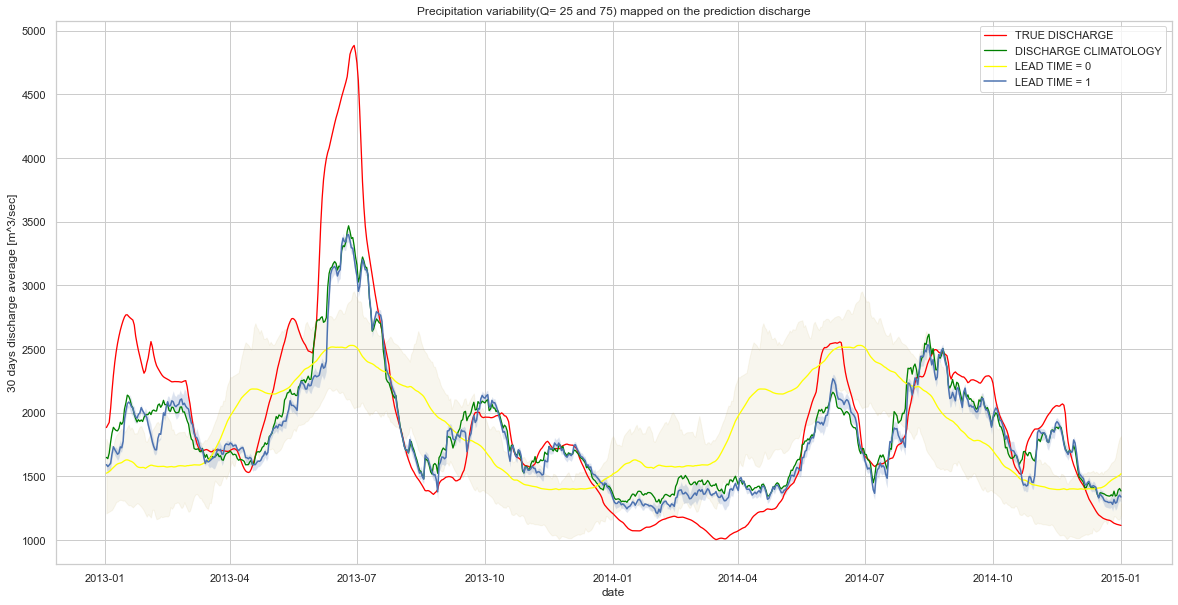

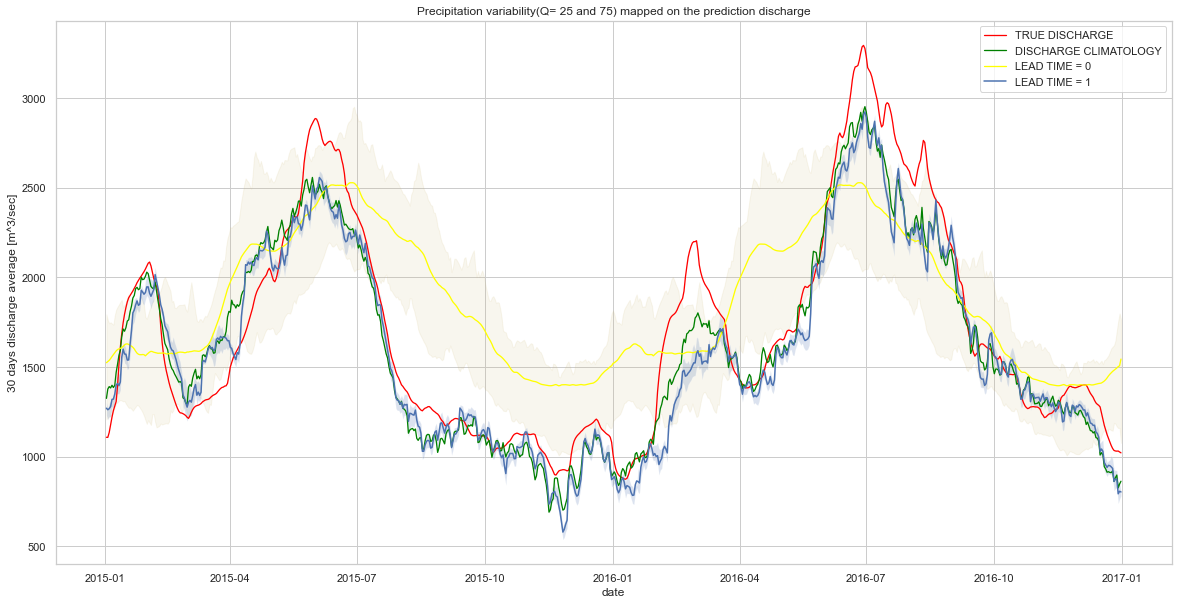

In [15]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)


In [15]:
predictions

,true_runoff,runoff_clim,runoff_clim_25,runoff_clim_75,trueTP,climTP_lt1,climTP_lt1_Q25,climTP_lt1_Q75,climTP_lt2,climTP_lt2_Q25,...,climTP_lt3_Q25,climTP_lt3_Q75,climTP_lt4,climTP_lt4_Q25,climTP_lt4_Q75,climTP_lt5,climTP_lt5_Q25,climTP_lt5_Q75,split,season
2009-01-03,1367.733333,1541.678378,1217.300000,1797.966667,1628.222545,1690.177106,1636.068092,1751.903635,1481.538112,1283.110261,...,1113.324121,1785.611769,1571.722567,1081.545596,1940.340099,1425.742024,868.050000,1849.548924,0,0
2009-01-04,1363.966667,1547.590991,1225.966667,1791.300000,1639.583167,1716.938108,1643.475504,1775.597667,1489.602371,1283.119526,...,1146.536470,1798.734825,1594.124114,1118.073096,1954.268465,1440.942167,898.509513,1859.317994,0,0
2009-01-05,1361.100000,1556.504505,1235.500000,1786.333333,1625.360468,1713.010316,1649.768423,1762.019120,1468.336636,1273.273030,...,1166.850420,1773.070293,1597.779866,1129.397351,1918.085797,1430.468095,895.833518,1801.067816,0,0
2009-01-06,1358.100000,1567.417117,1242.500000,1755.700000,1599.472759,1691.581477,1634.202168,1689.672099,1441.021766,1255.484524,...,1214.502953,1735.168858,1588.247484,1137.402425,1861.947366,1452.889303,935.306102,1785.558430,0,0
2009-01-07,1354.133333,1576.968468,1257.100000,1768.066667,1621.321999,1716.684264,1653.658639,1721.581177,1500.213934,1305.172053,...,1275.573121,1807.657383,1627.243582,1173.852699,1908.244441,1491.853598,970.249890,1816.146380,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,1031.833333,1507.873684,1191.225000,1786.625000,826.348394,824.517969,762.965471,893.489858,946.364203,781.078892,...,839.282302,1411.725670,1291.027962,855.326686,1621.456532,1265.181595,749.027126,1660.814201,3,0
2016-12-28,1030.833333,1512.025439,1181.233333,1796.391667,869.011484,853.522551,796.348574,902.534548,987.234652,837.876706,...,898.007558,1440.001719,1317.381975,905.449606,1612.631735,1303.295629,811.046890,1660.706447,3,0
2016-12-29,1031.500000,1518.167544,1173.058333,1808.208333,852.711313,827.598444,769.626092,890.276870,960.630047,787.834250,...,845.896281,1443.354412,1310.008673,867.988427,1634.653884,1283.078261,769.375522,1666.933672,3,0
2016-12-30,1026.766667,1521.439474,1172.791667,1815.275000,805.241187,769.292637,708.283052,841.197952,919.125029,735.818396,...,801.610126,1405.680985,1325.656509,872.291457,1640.777667,1269.822304,750.134411,1663.037002,3,0


In [16]:
from test import evaluate_class, evaluate_class_season
clas=evaluate_class_season(predictions)
clas.index=np.repeat(nb_name[:-6],4)
clas.to_csv('class_res.csv', mode='a', header=False)

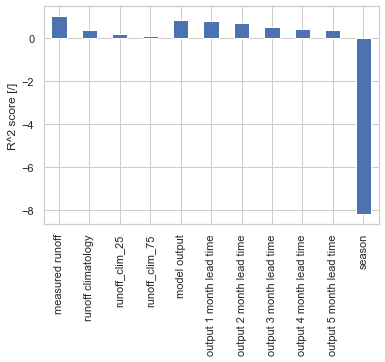

In [42]:
r=pd.DataFrame(evaluate_prediction(predictions)).transpose()
r['STAT_CODE']=(nb_name[:-6])
r.index=r.STAT_CODE
r.drop(columns=['season','runoff_clim_25','runoff_clim_75','STAT_CODE'],inplace=True)
r.to_csv('r_res.csv',mode='a',header=False)

measured runoff             1.000000
runoff climatology          0.369425
model output                0.779792
output 1 month lead time    0.730724
output 2 month lead time    0.627322
output 3 month lead time    0.481329
output 4 month lead time    0.408823
output 5 month lead time    0.373487
dtype: float64

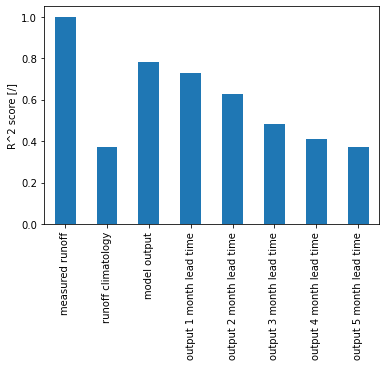

In [14]:
#notmasked
evaluate_prediction(predictions)

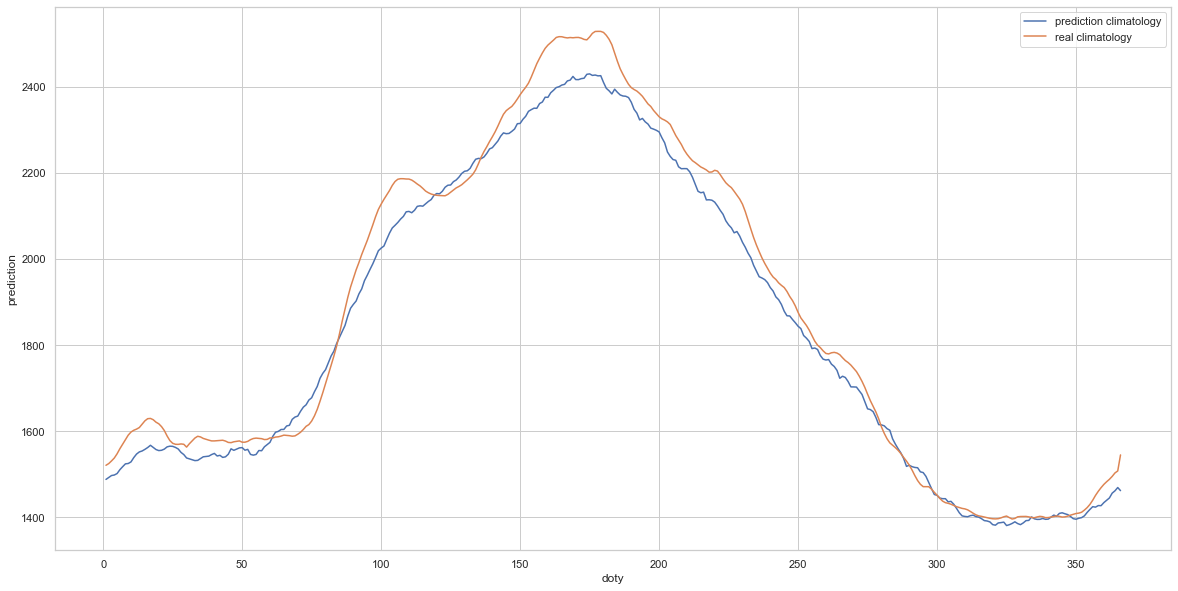

In [7]:
predictions_for_clim = classic_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, n_splits)
climatologies =predictions_for_clim.groupby(by=predictions_for_clim.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies['doty']=climatologies.index

sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(20,10))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='prediction climatology')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='real climatology')
plt.legend()

In [8]:
from db_insert import insert
insert(nb_name[:-6],predictions_for_clim)

In [15]:
##develop model savior

from sklearn.svm import SVR, LinearSVR
from sf_runoff import create_it_matrix
from joblib import dump, load

it_matrix=create_it_matrix(daily_input,t_length,t_unit).astype('float32')

X = it_matrix.drop(columns='Q')
y = it_matrix['Q']
svr_estimator = SVR(kernel='rbf', gamma='scale', cache_size=15000,C=C,epsilon=eps)

svr_estimator = make_pipeline(StandardScaler(),
                              TransformedTargetRegressor(regressor=svr_estimator, transformer=StandardScaler()))

svr_estimator.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=SVR(C=0.08413951416451952,
                                                          cache_size=15000,
                                                          epsilon=0.00021544346900318845),
                                            transformer=StandardScaler()))])

In [16]:
path='models/'+nb_name[:-6]+'.joblib'

dump(svr_estimator, path)

['models/ADO_DSC_AT12_0280.joblib']

In [17]:
#done